In [1]:
cd ..

/Users/lisawink/Documents/freiburg


# Plotting Temperature against Parameters

In [12]:
import geopandas as gpd
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import calc_params

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Temperature

In [4]:
temp =  pd.read_csv('/Users/lisawink/Documents/paper1/data/gap_filled_data_ta_rh.csv')
temp['datetime_UTC']=pd.to_datetime(temp['datetime_UTC'])
temp = temp[temp['variable']=='Ta_deg_C']

In [5]:
temp['datetime_UTC'] = temp['datetime_UTC'].astype(str)
temp = temp.pivot(index='station_id', columns='datetime_UTC', values='value')

# Urban form

In [19]:
params = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_160.parquet')

In [21]:
params.index = params['station_id']

In [22]:
to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','sky_view_factor','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry','SVF']
params = params.drop(to_remove, axis=1)

In [23]:
time = '2023-08-22 04:00:00+00:00'

In [24]:
params = params.merge(temp[time], left_on='station_id', right_on='station_id',how='inner')

In [25]:
stats = calc_params.calculate_statistics(params, time)

/Users/lisawink/Documents/freiburg/calc_params.py:420: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/Users/lisawink/Documents/freiburg/calc_params.py:423: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/Users/lisawink/Documents/freiburg/calc_params.py:420: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/Users/lisawink/Documents/freiburg/calc_params.py:423: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/Users/lisawink/Documents/freiburg/calc_params.py:420: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/Users/lisawink/Doc

In [26]:
# sort stats by mutual information
stats.sort_values(by='Mutual Information', ascending=False).head(20)

,Parameter,Pearson Correlation,Pearson p-value,Spearman Correlation,Spearman p-value,Mutual Information
839,StrH_max,0.714247,1.965205e-05,0.782704,8.571260e-07,0.529091
719,BuSWA_3D_median,0.756470,8.522432e-07,0.763306,5.918476e-07,0.471748
729,BuSWA_3D_per50,0.756470,8.522432e-07,0.763306,5.918476e-07,0.471748
872,StrHW_per50,0.733889,8.816203e-06,0.773946,1.357312e-06,0.442369
862,StrHW_median,0.733889,8.816203e-06,0.773946,1.357312e-06,0.442369
381,BuFra_3D_median,-0.430234,1.569839e-02,-0.658065,5.732329e-05,0.436327
391,BuFra_3D_per50,-0.430234,1.569839e-02,-0.658065,5.732329e-05,0.436327
210,BuFF_per75,0.546372,1.473146e-03,0.675806,3.017873e-05,0.421562
718,BuSWA_3D_mean,0.734068,2.603712e-06,0.762500,6.182462e-07,0.411559
278,BuSWR_std,0.375371,3.744555e-02,0.420968,1.835844e-02,0.409608


/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_56238/3159129675.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (params[var][i], params[time][i]))


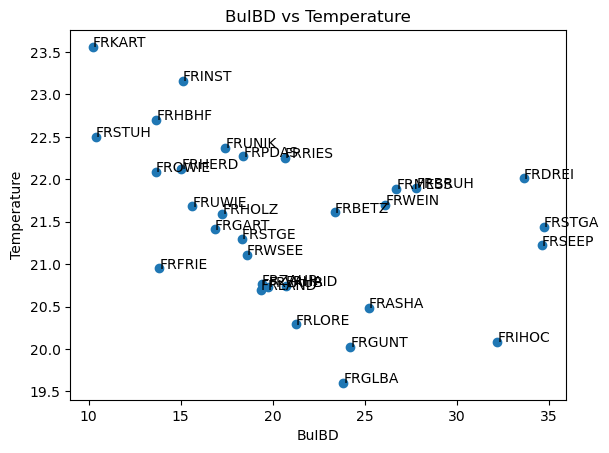

In [27]:
var = 'BuIBD'

plt.scatter(params[var], params[time])
plt.xlabel(var)
plt.ylabel('Temperature')
plt.title(var+' vs Temperature')

for i, txt in enumerate(params.index):
    plt.annotate(txt, (params[var][i], params[time][i]))


plt.show()


/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_56238/557590691.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (params[var][i], params[time][i]))


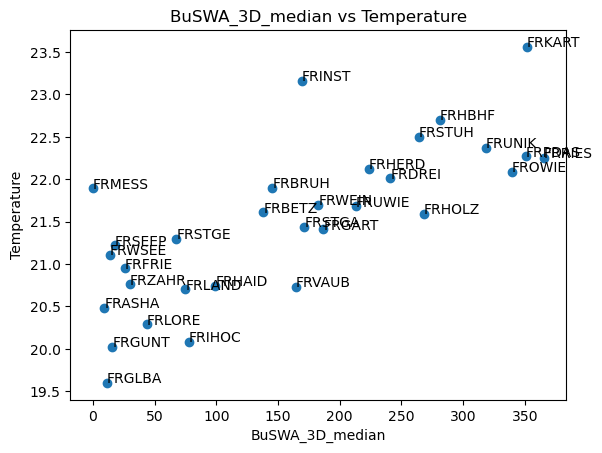

In [28]:
var = 'BuSWA_3D_median'

plt.scatter(params[var], params[time])
plt.xlabel(var)
plt.ylabel('Temperature')
plt.title(var+' vs Temperature')

for i, txt in enumerate(params.index):
    plt.annotate(txt, (params[var][i], params[time][i]))


plt.show()


/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_56238/2391306464.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (params[var][i], params[time][i]))


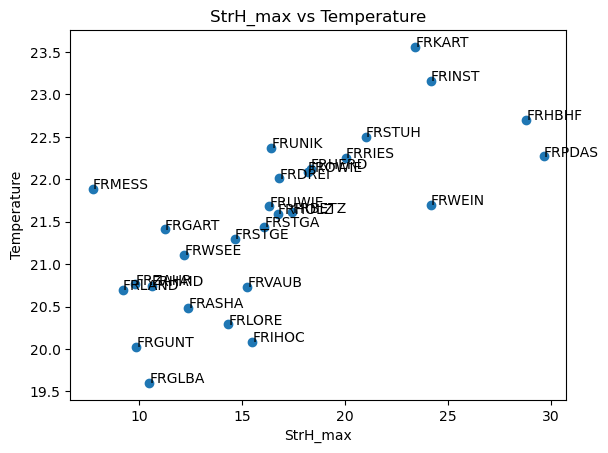

In [32]:
var = 'StrH_max'

plt.scatter(params[var], params[time])
plt.xlabel(var)
plt.ylabel('Temperature')
plt.title(var+' vs Temperature')

for i, txt in enumerate(params.index):
    plt.annotate(txt, (params[var][i], params[time][i]))


plt.show()

In [68]:
# select stats where mutual information is higher than absolute 0.1
selected_stats = stats[stats['Mutual Information']>0.2]

In [30]:
len(selected_stats)

118

In [31]:
selected_stats.sort_values(by='Mutual Information', ascending=False).head(50)

,Parameter,Pearson Correlation,Pearson p-value,Spearman Correlation,Spearman p-value,Mutual Information
839,StrH_max,0.714247,1.965205e-05,0.782704,8.571260e-07,0.529091
729,BuSWA_3D_per50,0.756470,8.522432e-07,0.763306,5.918476e-07,0.471748
719,BuSWA_3D_median,0.756470,8.522432e-07,0.763306,5.918476e-07,0.471748
862,StrHW_median,0.733889,8.816203e-06,0.773946,1.357312e-06,0.442369
872,StrHW_per50,0.733889,8.816203e-06,0.773946,1.357312e-06,0.442369
381,BuFra_3D_median,-0.430234,1.569839e-02,-0.658065,5.732329e-05,0.436327
391,BuFra_3D_per50,-0.430234,1.569839e-02,-0.658065,5.732329e-05,0.436327
210,BuFF_per75,0.546372,1.473146e-03,0.675806,3.017873e-05,0.421562
718,BuSWA_3D_mean,0.734068,2.603712e-06,0.762500,6.182462e-07,0.411559
278,BuSWR_std,0.375371,3.744555e-02,0.420968,1.835844e-02,0.409608


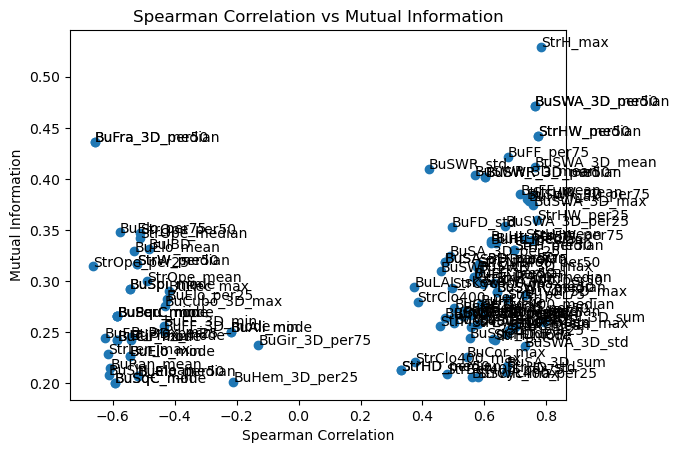

In [33]:
# plot spearman correlation and mutual information on plot for selected stats
# colour by groups

plt.scatter(selected_stats['Spearman Correlation'], selected_stats['Mutual Information'])
plt.xlabel('Spearman Correlation')
plt.ylabel('Mutual Information')
plt.title('Spearman Correlation vs Mutual Information') 

for i, txt in enumerate(selected_stats['Parameter']):
    plt.annotate(txt, (selected_stats['Spearman Correlation'].iloc[i], selected_stats['Mutual Information'].iloc[i]))
    
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
params_scaled = scaler.fit_transform(params)
params_scaled = pd.DataFrame(params_scaled, columns=params.columns, index=params.index)
params_scaled.columns.name = 'Parameter'
# remove columns with more than 7 NaN values
#params_scaled = params_scaled.dropna(thresh=params_scaled.shape[0] - 7, axis=1)

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [35]:
params_scaled[selected_stats['Parameter']]

Parameter,BuIBD,BuHt_mean,BuHt_median,BuHt_std,BuHt_max,BuHt_per25,BuHt_per50,BuHt_per75,BuLAL_skew,BuCCD_std_max,BuCor_std,BuCor_max,BuElo_mean,BuElo_median,BuElo_min,BuElo_mode,BuElo_per25,BuElo_per50,BuElo_per75,BuFF_mean,BuFF_median,BuFF_per50,BuFF_per75,BuFD_std,BuRec_max,BuShI_mean,BuSqC_std,BuSqC_min,BuSqC_mode,BuSWR_mean,BuSWR_median,BuSWR_std,BuSWR_max,BuSWR_MAD,BuSWR_per25,BuSWR_per50,BuAli_min,BuAli_mode,BuCir_min,BuCir_mode,BuHem_3D_per25,BuFra_3D_median,BuFra_3D_per25,BuFra_3D_per50,BuCubo_3D_max,BuSqu_min,BuSqu_mode,BuFF_3D_min,BuFF_3D_mode,BuProx_min,BuProx_mode,BuSpi_min,BuSpi_mode,BuPerC_min,BuPerC_mode,BuGir_3D_per75,BuRan_mean,BuSWA_3D_mean,BuSWA_3D_median,BuSWA_3D_std,BuSWA_3D_max,BuSWA_3D_per25,BuSWA_3D_per50,BuSWA_3D_per75,BuVol_3D_median,BuVol_3D_max,BuVol_3D_sum,BuVol_3D_per25,BuVol_3D_per50,BuSA_3D_median,BuSA_3D_sum,BuSA_3D_per25,BuSA_3D_per50,BuSWR_3D_mean,BuSWR_3D_median,BuSWR_3D_max,BuSWR_3D_per50,BuSWR_3D_per75,StrLen_max,StrW_median,StrW_per50,StrOpe_mean,StrOpe_median,StrOpe_per25,StrOpe_per50,StrH_mean,StrH_median,StrH_max,StrH_sum,StrH_mode,StrH_per25,StrH_per50,StrH_per75,StrHD_median,StrHD_std,StrHD_IQR,StrHD_MAD,StrHD_per50,StrHD_per75,StrHW_mean,StrHW_median,StrHW_per25,StrHW_per50,StrHW_per75,StrClo400_max,StrClo400_per75,StrBet400_median,StrBet400_per50,StrBet400_per75,StrMes400_mode,StrCyc400_mean,StrCyc400_median,StrCyc400_max,StrCyc400_per25,StrCyc400_per50,StrCyc400_per75,StrENR400_median,StrENR400_per50
station_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FRASHA,0.651823,0.025624,-0.193851,-0.134827,-0.404796,0.096211,-0.193851,0.591518,1.244466,0.426630,-0.703066,-0.762765,1.416299,1.475512,-1.119517,-1.119517,1.718122,1.475512,1.320328,-1.131806,-0.938922,-0.938922,-1.306316,-1.067439,-0.512870,1.297110,-1.170842,0.664670,0.664670,-1.084234,-1.249935,-0.763468,-1.320256,-1.225199,-0.943556,-1.249935,0.559534,0.559534,0.629109,0.629109,1.246075,0.124654,-0.548042,0.124654,-0.553953,0.652434,0.652434,0.453433,0.453433,-0.461974,-0.461974,-0.620955,-0.620955,0.652434,0.652434,1.330607,1.269093,-1.072081,-1.248912,-0.734930,-0.764779,-0.999023,-1.248912,-0.905713,-0.606332,-0.511570,-0.739739,-0.430098,-0.606332,-0.634033,-0.892094,-0.486627,-0.634033,-1.028749,-1.300816,-0.878599,-1.300816,-0.768885,-0.496579,0.890951,0.890951,1.049216,0.814763,0.885961,0.814763,-0.697492,-0.678041,-0.720622,-0.584602,-0.750611,-0.453992,-0.678041,-0.592284,-1.098860,-0.526948,NaN,NaN,-1.098860,-1.364102,-0.049399,-0.445171,-0.769346,-0.445171,-0.089161,1.103168,0.961067,-0.740818,-0.740818,-0.660897,-1.202648,-0.702781,-0.707488,-0.474666,-0.785133,-0.707488,-0.680477,-0.680391,-0.680391
FRBETZ,0.374310,0.138982,-0.488781,1.142972,0.409884,-0.672008,-0.488781,0.937174,0.422914,-0.320437,-0.380152,-0.494825,0.199835,0.011708,-0.345186,-0.345186,0.442253,0.011708,-0.613360,-0.249795,-0.059453,-0.059453,-0.785936,0.023165,0.561875,0.293905,0.115322,-0.587994,-0.587994,0.860875,0.729463,0.721402,0.196430,0.428887,0.741824,0.729463,-0.539253,-0.539253,0.490232,0.490232,0.742319,-0.317402,-0.680717,-0.317402,0.575377,0.529341,0.529341,0.144850,0.144850,-0.193657,-0.193657,-0.074920,-0.074920,0.529341,0.529341,0.591176,0.330026,-0.262721,-0.157822,-0.359617,-0.374907,-0.193883,-0.157822,-0.364567,-0.141535,-0.442055,-0.255558,-1.101419,-0.141535,-0.219961,-0.216965,-1.216876,-0.219961,0.570430,0.555540,0.005820,0.555540,0.912947,0.820310,0.331589,0.331589,-0.246995,-0.180816,0.220019,-0.180816,0.327948,0.323429,0.172035,-0.770420,0.215447,0.160130,0.323429,0.506114,1.975954,-0.428251,-0.575863,0.034107,1.975954,1.368186,-0.308550,-0.234673,-0.091558,-0.234673,-0.355465,-1.061916,-1.108744,-0.740818,-0.740818,-0.665943,-1.202648,-0.932972,-0.882022,-1.028444,-0.785133,-0.882022,-1.005482,-2.099636,-2.099636
FRBRUH,1.041891,-0.736598,-1.036229,0.869151,0.405554,-1.023264,-1.036229,-0.359097,-1.790262,0.606727,-0.251149,-0.561810,-1.3

In [36]:
import altair as alt
from mpl_toolkits.mplot3d import Axes3D
alt.data_transformers.enable("vegafusion")

corr = params_scaled[selected_stats['Parameter']].corr()
long_df = corr.reset_index().melt(id_vars='Parameter', var_name='Variable', value_name='Correlation')

# Create the heatmap using Altair
heatmap = alt.Chart(long_df).mark_rect().encode(
    x=alt.X('Parameter:N', title='Variables', sort=None),  # Column names
    y=alt.Y('Variable:N', title='Variables', sort=None),  # Row names
    color=alt.Color('Correlation:Q', scale=alt.Scale(scheme='viridis'), title='Correlation'),
    tooltip=['Parameter', 'Variable', 'Correlation']  # Tooltips for interactivity
).properties(
    width=1000,
    height=1000,
    title='Correlation Heatmap'
).interactive()

# Display the heatmap
heatmap.show()

alt.Chart(...)

# Correlated vars

In [41]:
# find groups of highly correlated variables

# Step 1: Define a threshold for correlation
threshold = 0.9

# Step 2: Find groups of highly correlated variables
groups = []

for i, row in corr.iterrows():
    group = [i]
    for j, value in row.items():
        if i != j and value > threshold:
            group.append(j)
    if len(group) > 1:
        group = sorted(group)
        groups.append(group)

# Display the groups
for group in groups:
    print(group)


['BuHt_mean', 'BuHt_median', 'BuHt_per25', 'BuHt_per50', 'BuHt_per75', 'StrH_per25']
['BuHt_mean', 'BuHt_median', 'BuHt_per25', 'BuHt_per50', 'BuHt_per75']
['BuHt_mean', 'BuHt_median', 'BuHt_per25', 'BuHt_per50']
['BuHt_mean', 'BuHt_median', 'BuHt_per25', 'BuHt_per50', 'BuHt_per75']
['BuHt_mean', 'BuHt_median', 'BuHt_per50', 'BuHt_per75']
['BuCor_max', 'BuCor_std']
['BuCor_max', 'BuCor_std']
['BuElo_mean', 'BuElo_median', 'BuElo_per25', 'BuElo_per50', 'BuElo_per75']
['BuElo_mean', 'BuElo_median', 'BuElo_per50']
['BuElo_min', 'BuElo_mode']
['BuElo_min', 'BuElo_mode']
['BuElo_mean', 'BuElo_per25']
['BuElo_mean', 'BuElo_median', 'BuElo_per50']
['BuElo_mean', 'BuElo_per75']
['BuFF_mean', 'BuFF_per75']
['BuFF_median', 'BuFF_per50']
['BuFF_median', 'BuFF_per50']
['BuFF_mean', 'BuFF_per75']
['BuCubo_3D_max', 'BuRec_max']
['BuRan_mean', 'BuShI_mean']
['BuCir_min', 'BuCir_mode', 'BuPerC_min', 'BuPerC_mode', 'BuSqC_min', 'BuSqC_mode', 'BuSqu_min', 'BuSqu_mode']
['BuCir_min', 'BuCir_mode', 'BuPer

In [42]:
# remove duplicate groups from groups
unique_groups = []

for group in groups:
    if group not in unique_groups:
        unique_groups.append(group) 

unique_groups


[['BuHt_mean',
  'BuHt_median',
  'BuHt_per25',
  'BuHt_per50',
  'BuHt_per75',
  'StrH_per25'],
 ['BuHt_mean', 'BuHt_median', 'BuHt_per25', 'BuHt_per50', 'BuHt_per75'],
 ['BuHt_mean', 'BuHt_median', 'BuHt_per25', 'BuHt_per50'],
 ['BuHt_mean', 'BuHt_median', 'BuHt_per50', 'BuHt_per75'],
 ['BuCor_max', 'BuCor_std'],
 ['BuElo_mean', 'BuElo_median', 'BuElo_per25', 'BuElo_per50', 'BuElo_per75'],
 ['BuElo_mean', 'BuElo_median', 'BuElo_per50'],
 ['BuElo_min', 'BuElo_mode'],
 ['BuElo_mean', 'BuElo_per25'],
 ['BuElo_mean', 'BuElo_per75'],
 ['BuFF_mean', 'BuFF_per75'],
 ['BuFF_median', 'BuFF_per50'],
 ['BuCubo_3D_max', 'BuRec_max'],
 ['BuRan_mean', 'BuShI_mean'],
 ['BuCir_min',
  'BuCir_mode',
  'BuPerC_min',
  'BuPerC_mode',
  'BuSqC_min',
  'BuSqC_mode',
  'BuSqu_min',
  'BuSqu_mode'],
 ['BuSWR_3D_mean',
  'BuSWR_3D_median',
  'BuSWR_3D_per50',
  'BuSWR_3D_per75',
  'BuSWR_mean',
  'BuSWR_median',
  'BuSWR_per25',
  'BuSWR_per50'],
 ['BuSWR_3D_mean',
  'BuSWR_3D_median',
  'BuSWR_3D_per50',
 

In [43]:
# add a group label to selected subsets for unique groups
selected_stats['Group'] = None

for i, row in selected_stats.iterrows():
    for group in unique_groups:
        if row['Parameter'] in group:
            selected_stats.loc[i, 'Group'] = str(group)

selected_stats

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_56238/2278654410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_stats['Group'] = None


,Parameter,Pearson Correlation,Pearson p-value,Spearman Correlation,Spearman p-value,Mutual Information,stats,Group
1,BuIBD,-0.420763,1.842113e-02,-0.482258,6.006476e-03,0.331707,NaN,None
16,BuHt_mean,0.581435,6.026679e-04,0.680645,2.514399e-05,0.252748,mean,"['BuHt_mean', 'StrH_mean', 'StrH_median', 'Str..."
17,BuHt_median,0.538558,1.774660e-03,0.620968,1.933491e-04,0.337043,median,"['BuHt_mean', 'BuHt_median', 'BuHt_per50', 'Bu..."
18,BuHt_std,0.566635,8.895446e-04,0.587500,5.110184e-04,0.277455,std,None
20,BuHt_max,0.657390,5.869080e-05,0.743145,1.678790e-06,0.378469,max,None
26,BuHt_per25,0.467285,8.039255e-03,0.530242,2.153163e-03,0.270423,per25,"['BuHt_mean', 'BuHt_median', 'BuHt_per25', 'Bu..."
27,BuHt_per50,0.538558,1.774660e-03,0.620968,1.933491e-04,0.339731,per50,"['BuHt_mean', 'BuHt_median', 'BuHt_per50', 'Bu..."
28,BuHt_per75,0.535158,1.921742e-03,0.635887,1.208462e-04,0.337435,per75,"['BuHt_mean', 'BuHt_median', 'BuHt_per50', 'Bu..."
51,BuLAL_skew,0.403894,2.423727e-02,0.373790,3.832024e-02,0.294652,skew,None
72,BuCCD_std_max,0.657216,5.904894e-05,0.697581,1.291297e-05,0.254730,std,None


# Categories

In [69]:
items = params['Parameter'].unique()

# Define mapping of abbreviations to categories
prefix_to_category = {
    'BuAre': 'Dimension', 'BuHt': 'Dimension', 'BuPer': 'Dimension',
    'BuLAL': 'Dimension', 'BuCCD': 'Dimension', 'BuCor': 'Dimension',
    'BuSA' : 'Dimension', 'BuVol': 'Dimension', 'BuSWA': 'Dimension',
    'CyAre': 'Dimension', 'CyInd': 'Dimension', 'BuCWA': 'Shape',
    'BuCon': 'Shape', 'BuElo': 'Shape', 'BuERI': 'Shape',
    'BuFR': 'Shape', 'BuFF': 'Shape', 'BuFD': 'Shape',
    'BuRec': 'Shape', 'BuShI': 'Shape', 'BuSqC': 'Shape',
    'BuSqu': 'Shape', 'BuCir': 'Shape', 'BuHem': 'Shape',
    'BuFra' : 'Shape', 'BuCubo' : 'Shape',  'BuProx' : 'Shape',
    'BuSpi' : 'Shape', 'BuPerC' : 'Shape', 'BuGir' : 'Shape',
    'BuRan' : 'Shape', 'BuAdj': 'Distribution', 'BuIBD': 'Distribution',
    'BuSWR': 'Distribution', 'BuOri': 'Orientation', 'BuAli': 'Orientation',
    'StrAli': 'Orientation', 'StrW': 'Distribution', 'StrWD': 'Distribution',
    'StrOpe': 'Distribution', 'StrHW': 'Distribution', 'StrH': 'Dimension',
    'StrHD': 'Distribution','StrLen': 'Dimension',
    'StrCNS': 'Dimension', 'BpM': 'Intensity', 'StrLin': 'Shape',
    'StrClo400': 'Connectivity', 'StrBet400': 'Connectivity', 
    'StrSCl': 'Connectivity', 'StrCyc400': 'Connectivity', 
    'StrENR400': 'Connectivity', 'StrGam400': 'Connectivity', 
    'StrDeg': 'Connectivity', 'StrMes400': 'Connectivity',
    'SVF': 'Distribution'
}

unique_prefixes = [item.split('_')[0] for item in items]

# Generate categories data dynamically
categories_data = [
    {'Category': prefix_to_category.get(prefix, 'Unknown'), 'Abbrev.': items[i]}
    for i,prefix in enumerate(unique_prefixes)
]

In [70]:
scaled_subselect = params_scaled[selected_stats['Parameter']]
scaled_subselect[time] = params_scaled[time]

# Create the new structure
rows = []
for station_id, row in scaled_subselect.iterrows():
    y = row[time]
    for param in scaled_subselect.columns[:-1]:  # Exclude 'y'
        rows.append({
            "station_id": station_id,
            "x": row[param],
            "y": y,
            "Parameter": param
        })

# Create the transformed DataFrame
transformed_df = pd.DataFrame(rows).set_index("station_id")
categories_df = pd.DataFrame(categories_data)

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_56238/3596142954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_subselect[time] = params_scaled[time]


In [71]:
selected_stats = selected_stats.merge(categories_df, how='left', left_on='Parameter', right_on='Abbrev.')

In [45]:
params =  transformed_df
params['station_id'] = params.index
selected_stats['stats'] = selected_stats['Parameter'].str.split('_').str[1]

# Left plot: R-squared vs Gradient scatter plot
selection = alt.selection_point(fields=['Parameter'], empty='none', on='click', toggle='event.shiftKey')  # Selection on param
selection1 = alt.selection_point(fields=['Group'], bind='legend', on='click', toggle='event.shiftKey')
selection2 = alt.selection_point(fields=['stats'], bind='legend', on='click', toggle='event.shiftKey')

# Dropdown selection
dropdown = alt.binding_select(options=selected_stats['Parameter'].unique(), name='Select parameter: ')
dropdown_selection = alt.selection_point(fields=['Parameter'], bind=dropdown)


# Step 2: Add category coloring to scatter plot
category_colors = alt.Scale(scheme='category10')  # Use a predefined Altair color scheme

scatter_plot = alt.Chart(selected_stats).mark_point(size=100).encode(
    x=alt.X('Spearman Correlation:Q', title='Spearman Correlation'),
    y=alt.Y('Mutual Information:Q', title='Mutual Information'),
    color=alt.condition(selection1, 'Group:N', alt.value('lightgray')),
    shape=alt.Shape('stats:N', title='Statistic'),
    opacity=alt.condition(selection2, alt.value(1), alt.value(0.2)),
    tooltip=['Parameter', 'Group', 'Spearman Correlation', 'Mutual Information']
).add_params(
    selection, selection1, selection2, dropdown_selection
).properties(
    title='Gradient vs R-squared',
    width=400,
    height=300
).interactive()

# Step 3: Right plot remains the same
points = alt.Chart(params).transform_filter(
    selection | dropdown_selection
).mark_point().encode(
    x=alt.X('x:Q', title='X'),
    y=alt.Y('y:Q', title='Temperature'),
    tooltip=['x', 'y']
)

# Create the text labels for the station IDs
text_labels = alt.Chart(params).transform_filter(
    selection | dropdown_selection
).mark_text(
    align='left', 
    baseline='middle', 
    dx=5,  # Slightly offset the text so it doesn't overlap the point
).encode(
    x='x',
    y='y',
    text='station_id'  # Use station_id as the label
)

# add drop down box for Parameter


regression_plot = (points + text_labels).properties(
    title='Linear Regression Plot',
    width=400,
    height=300
).interactive()

# Combine the plots
final_chart = alt.vconcat(scatter_plot, regression_plot)
final_chart.show()

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_56238/928451701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_stats['stats'] = selected_stats['Parameter'].str.split('_').str[1]


alt.VConcatChart(...)

In [73]:
params =  transformed_df
params['station_id'] = params.index
selected_stats['stats'] = selected_stats['Parameter'].str.split('_').str[1]

# Left plot: R-squared vs Gradient scatter plot
selection = alt.selection_point(fields=['Parameter'], empty='none', on='click', toggle='event.shiftKey')  # Selection on param
selection1 = alt.selection_point(fields=['Category'], bind='legend', on='click', toggle='event.shiftKey')
selection2 = alt.selection_point(fields=['stats'], bind='legend', on='click', toggle='event.shiftKey')

# Step 2: Add category coloring to scatter plot
category_colors = alt.Scale(scheme='category10')  # Use a predefined Altair color scheme

scatter_plot = alt.Chart(selected_stats).mark_point(size=100).encode(
    x=alt.X('Spearman Correlation:Q', title='Spearman Correlation'),
    y=alt.Y('Mutual Information:Q', title='Mutual Information'),
    color=alt.condition(selection1, 'Category:N', alt.value('lightgray')),
    shape=alt.Shape('stats:N', title='Statistic'),
    opacity=alt.condition(selection2, alt.value(1), alt.value(0.2)),
    tooltip=['Parameter', 'Category', 'Spearman Correlation', 'Mutual Information']
).add_params(
    selection, selection1, selection2
).properties(
    title='Mutual Information vs Spearman Correlation',
    width=400,
    height=300
).interactive()

# Step 3: Right plot remains the same
points = alt.Chart(params).transform_filter(
    selection
).mark_point().encode(
    x=alt.X('x:Q', title='X'),
    y=alt.Y('y:Q', title='Temperature'),
    tooltip=['x', 'y']
)

# Create the text labels for the station IDs
text_labels = alt.Chart(params).transform_filter(
    selection
).mark_text(
    align='left', 
    baseline='middle', 
    dx=5,  # Slightly offset the text so it doesn't overlap the point
).encode(
    x='x',
    y='y',
    text='station_id'  # Use station_id as the label
)

# add drop down box for Parameter


regression_plot = (points + text_labels).properties(
    title='Linear Regression Plot',
    width=400,
    height=300
).interactive()

# Combine the plots
final_chart = alt.vconcat(scatter_plot, regression_plot)
final_chart.show()

alt.VConcatChart(...)

In [ ]:
# add drop down menu to select parameter